# Random Forest
In this notebook, we implemented and evaluated a Random Forest model to predict auto loan default (bad_flag).

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from preprocessing import load_data, preprocess_data
from model_evaluation import evaluate_models, tune_hyperparameters, feature_importance, threshold_analysis, cross_val_pr_curve, cross_val_roc_curve
import xgboost as xgb
from sklearn.metrics import classification_report

## Load & Preprocess Data

In [11]:
train_path = "/Users/heba/Desktop/Erdos/Training Dataset A_R-384891_Candidate Attach #1_PresSE_SRF #1142.csv"
eval_path = "/Users/heba/Desktop/Erdos/Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv"

df_train, df_eval = load_data(train_path, eval_path)
X_train_processed, y_train, X_eval_processed, y_eval, to_drop_corr, cols_to_drop, preprocessor = preprocess_data(df_train, df_eval)

print("Train shape:", X_train_processed.shape)
print("Eval shape:", X_eval_processed.shape)

Train shape: (21348, 28)
Eval shape: (5336, 28)


### Random Forest

Best Params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
CV Scores: [0.95556805 0.95543371 0.95541491]
Mean CV Score: 0.9554722251642408
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.01      0.02       958
           1       0.96      1.00      0.98     20390

    accuracy                           0.96     21348
   macro avg       0.79      0.50      0.50     21348
weighted avg       0.94      0.96      0.93     21348



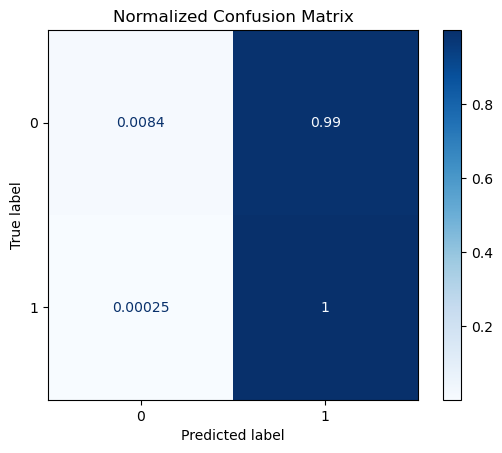

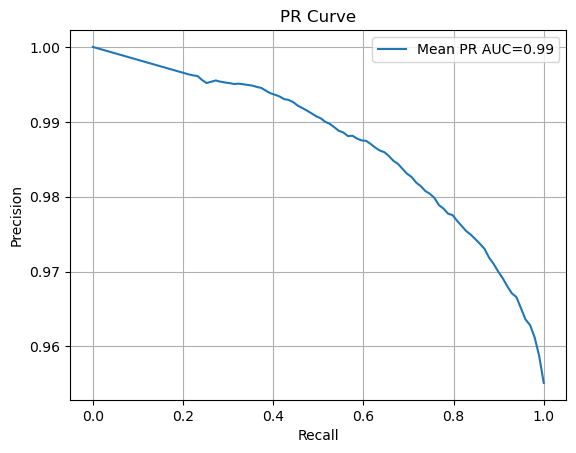

Mean PR AUC: 0.9872


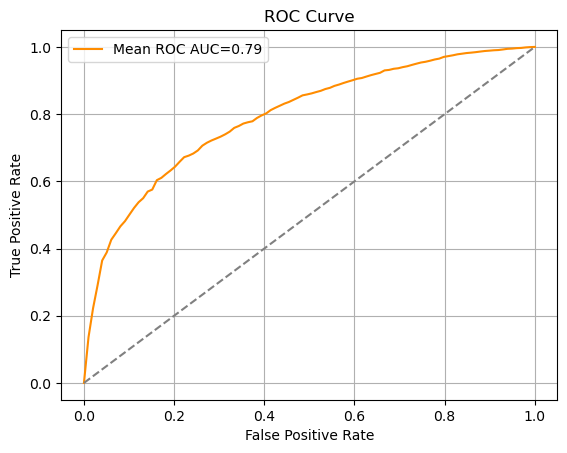

Mean ROC AUC: 0.7949


/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/miniconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomFo

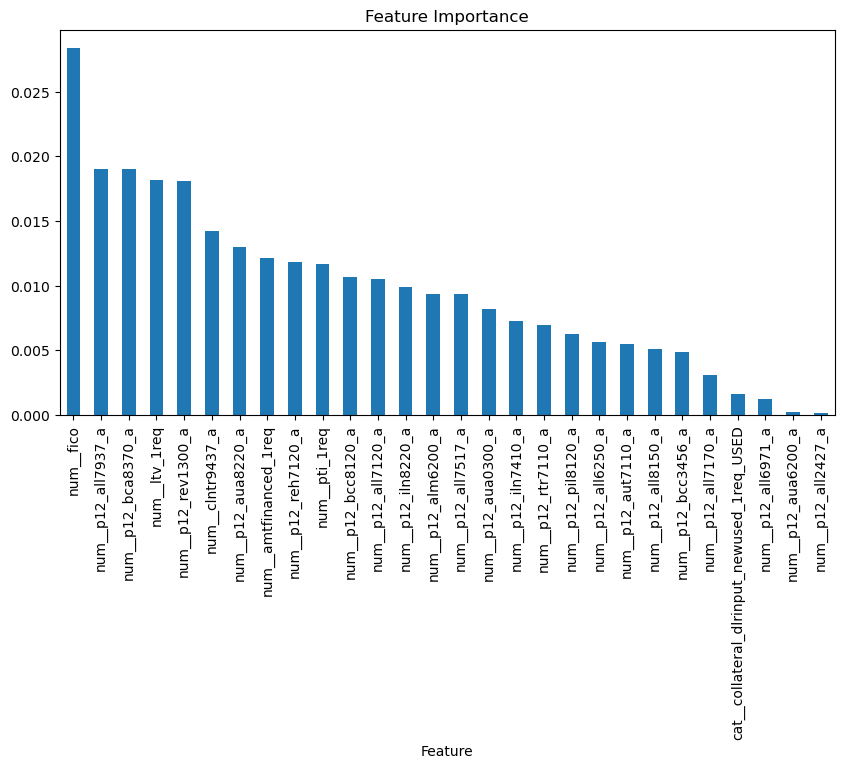

In [12]:
from sklearn.model_selection import GridSearchCV
# Convert to DataFrame with feature names
X_train_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

# Define param grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Tune with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=3, n_jobs=-1)
grid_rf.fit(X_train_df, y_train)

# Report best params
print("Best Params:", grid_rf.best_params_)

# Final model
rf_best = grid_rf.best_estimator_

# Evaluate
evaluate_models(rf_best, X_train_df, y_train)

# Feature importance
feature_importance(rf_best, X_train_df, y_train)

import warnings
warnings.filterwarnings("ignore", message="X has feature names, but")


CV Scores: [0.98369977 0.98347743 0.97615943]
Mean CV Score: 0.9811122106312906
Classification Report:               precision    recall  f1-score   support

           0       0.12      0.69      0.20       958
           1       0.98      0.76      0.86     20390

    accuracy                           0.76     21348
   macro avg       0.55      0.72      0.53     21348
weighted avg       0.94      0.76      0.83     21348



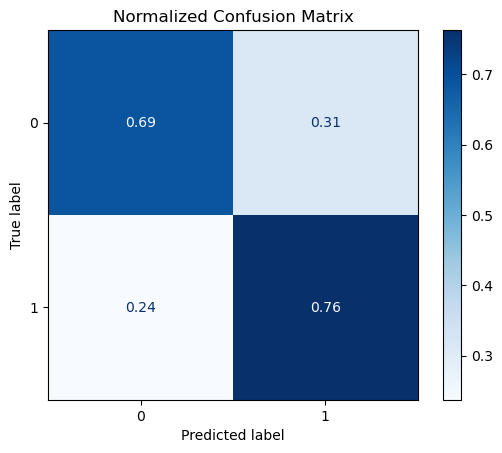

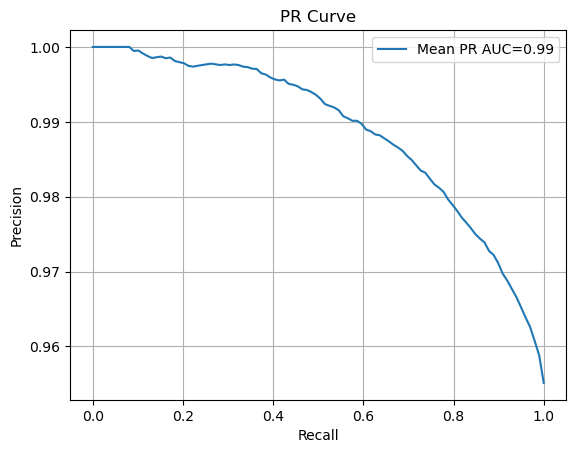

Mean PR AUC: 0.9889


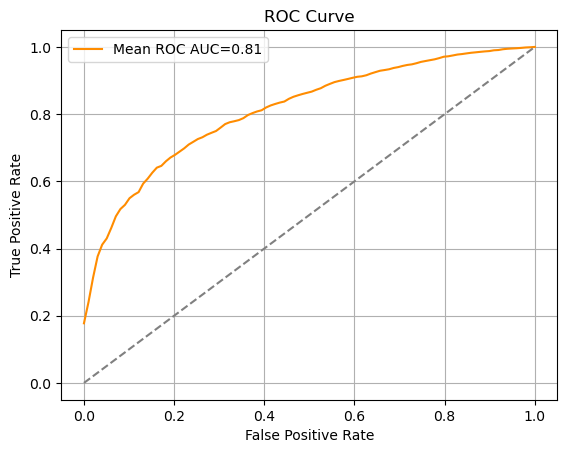

Mean ROC AUC: 0.8130


,precision,recall,f1-score,support
0,0.119680,0.686848,0.203841,958.000000
1,0.981073,0.762629,0.858168,20390.000000
accuracy,0.759228,0.759228,0.759228,0.759228
macro avg,0.550376,0.724738,0.531005,21348.000000
weighted avg,0.942417,0.759228,0.828805,21348.000000


In [13]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
brf.fit(X_train_df, y_train)
evaluate_models(brf, X_train_df, y_train)


In [14]:
y_proba_eval = brf.predict_proba(X_eval_processed)[:, 1]


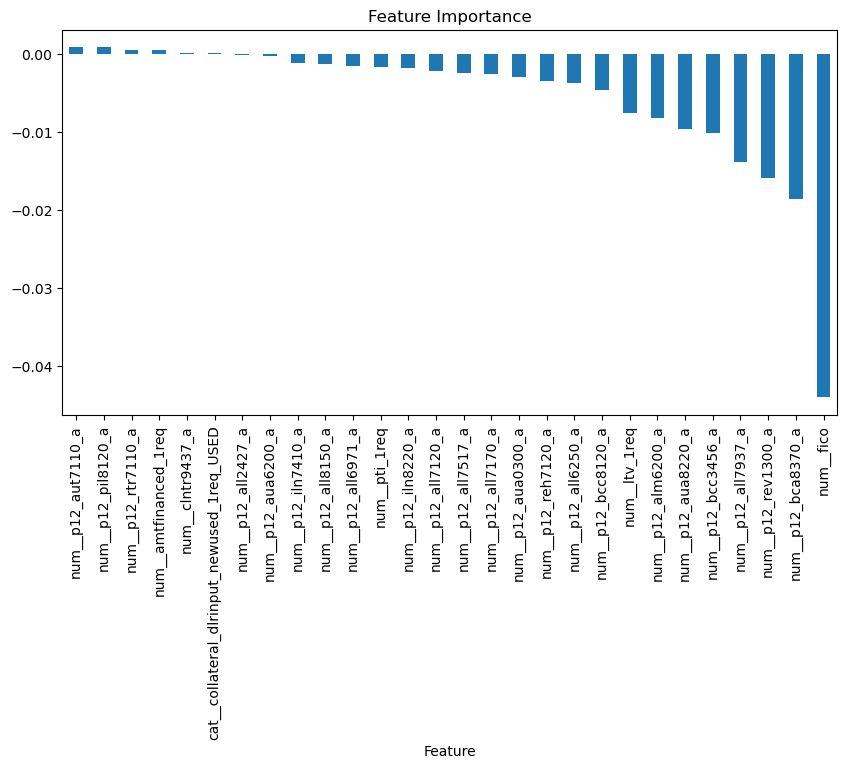

,Feature,Importance
6,num__p12_aut7110_a,0.000909
18,num__p12_pil8120_a,0.000904
17,num__p12_rtr7110_a,0.000623
1,num__amtfinanced_1req,0.000562
26,num__clntr9437_a,0.000173
27,cat__collateral_dlrinput_newused_1req_USED,0.000145
23,num__p12_all2427_a,-0.000126
22,num__p12_aua6200_a,-0.000141
10,num__p12_iln7410_a,-0.001120
12,num__p12_all8150_a,-0.001279


In [15]:
feature_importance(brf, X_train_df, y_train)


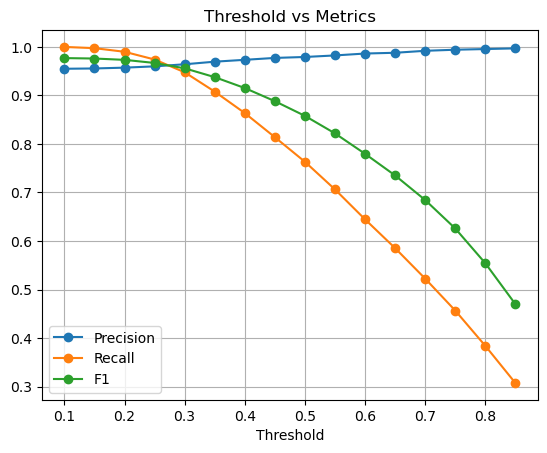

,Threshold,Precision,Recall,F1
0,0.10,0.954818,0.999804,0.976793
1,0.15,0.955426,0.997252,0.975891
2,0.20,0.957099,0.989792,0.973171
3,0.25,0.959760,0.973891,0.966774
4,0.30,0.964050,0.947585,0.955747
5,0.35,0.969392,0.907735,0.937551
6,0.40,0.973230,0.863565,0.915124
7,0.45,0.977139,0.813899,0.888080
8,0.50,0.979098,0.763251,0.857805
9,0.55,0.982255,0.706321,0.821743


In [16]:
from model_evaluation import threshold_analysis
threshold_analysis(y_eval, y_proba_eval)

In [17]:
from sklearn.metrics import classification_report

y_pred_eval = (y_proba_eval >= 0.35).astype(int)
print("=== Final Evaluation on Test Set ===")
print(classification_report(y_eval, y_pred_eval))


=== Final Evaluation on Test Set ===
              precision    recall  f1-score   support

           0       0.17      0.40      0.24       242
           1       0.97      0.91      0.94      5094

    accuracy                           0.88      5336
   macro avg       0.57      0.65      0.59      5336
weighted avg       0.93      0.88      0.91      5336



Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
CV Scores: [0.98544947 0.98530892 0.97926131]
Mean CV Score: 0.9833398981985932
Classification Report:               precision    recall  f1-score   support

           0       0.11      0.74      0.19       958
           1       0.98      0.73      0.84     20390

    accuracy                           0.73     21348
   macro avg       0.55      0.73      0.51     21348
weighted avg       0.94      0.73      0.81     21348



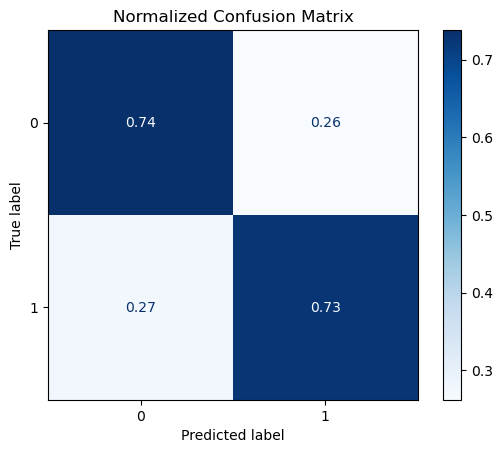

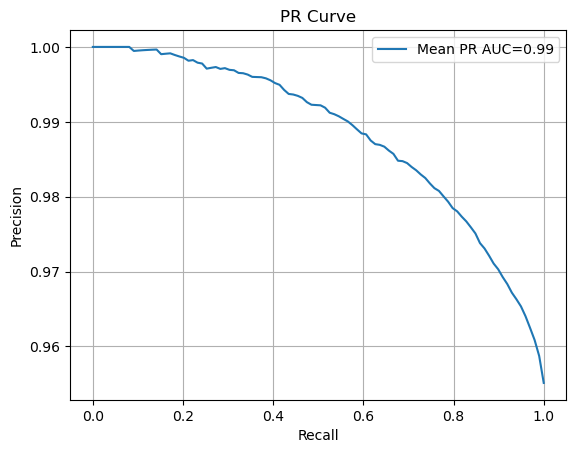

Mean PR AUC: 0.9884


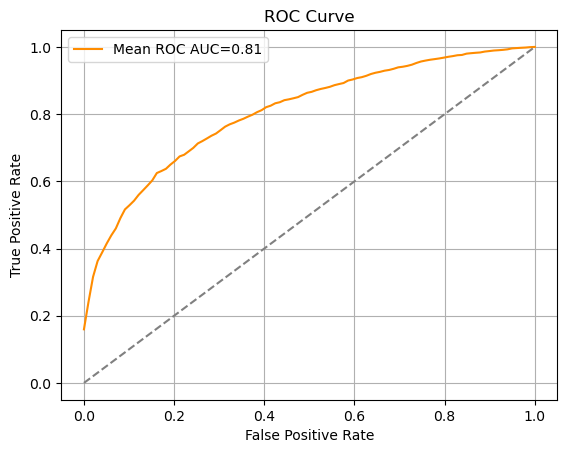

Mean ROC AUC: 0.8065


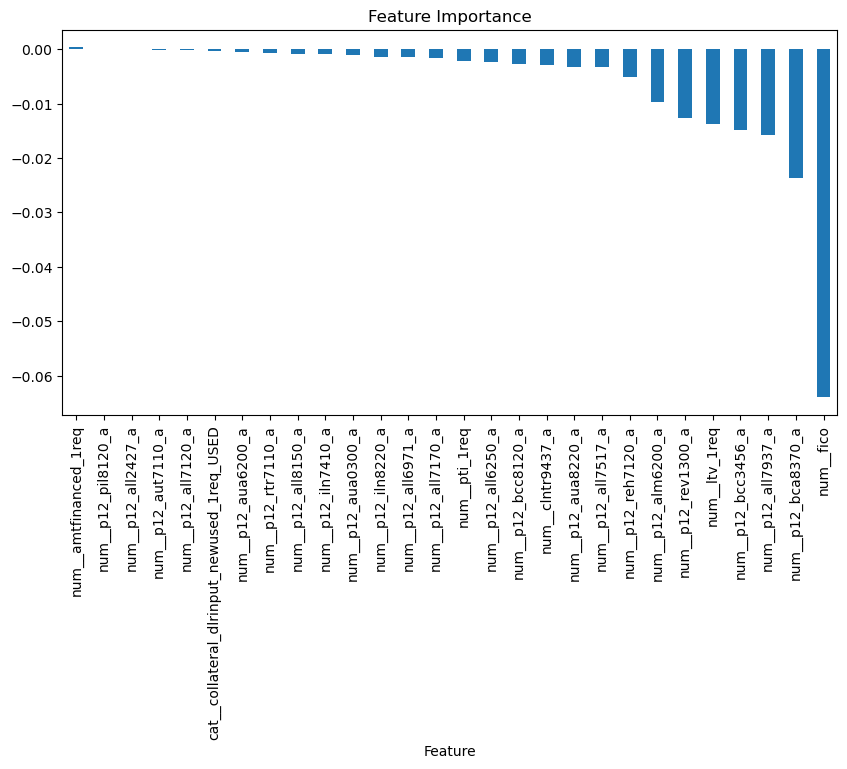

,Feature,Importance
1,num__amtfinanced_1req,0.000323
18,num__p12_pil8120_a,0.000061
23,num__p12_all2427_a,-0.000009
6,num__p12_aut7110_a,-0.000155
7,num__p12_all7120_a,-0.000225
27,cat__collateral_dlrinput_newused_1req_USED,-0.000393
22,num__p12_aua6200_a,-0.000590
17,num__p12_rtr7110_a,-0.000740
12,num__p12_all8150_a,-0.000815
10,num__p12_iln7410_a,-0.000885


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Step 1: Convert X_train to DataFrame with feature names (if needed)
X_train_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

# Step 2: Define param grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Step 3: Run GridSearchCV with 3-fold CV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_rf.fit(X_train_df, y_train)

# Step 4: Report best params and retrain with them
print("Best Params:", grid_rf.best_params_)
rf_best = grid_rf.best_estimator_

# Step 5: Evaluate on training set
evaluate_models(rf_best, X_train_df, y_train)

# Step 6: Plot feature importance
feature_importance(rf_best, X_train_df, y_train)


=== Final Evaluation on Test Set ===
              precision    recall  f1-score   support

           0       0.11      0.69      0.18       242
           1       0.98      0.72      0.83      5094

    accuracy                           0.72      5336
   macro avg       0.54      0.71      0.51      5336
weighted avg       0.94      0.72      0.80      5336



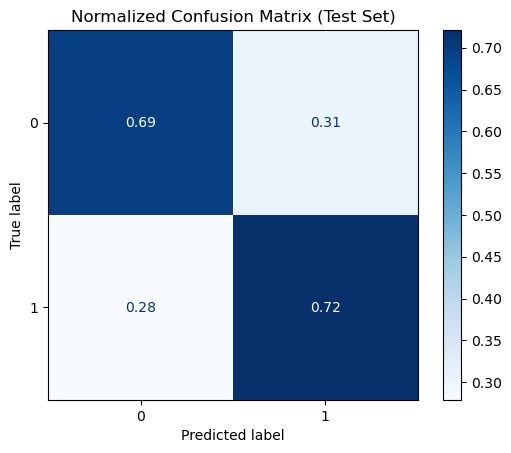

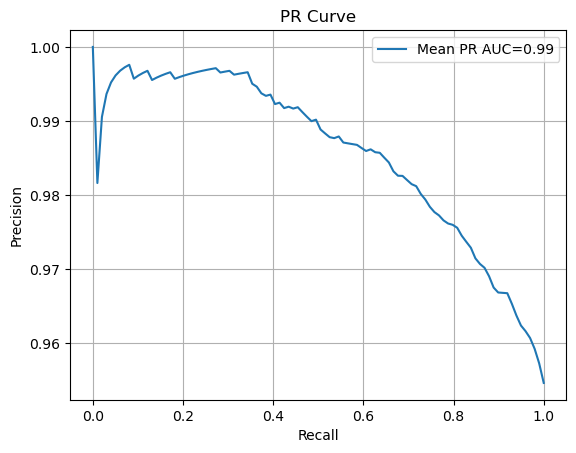

Mean PR AUC: 0.9859


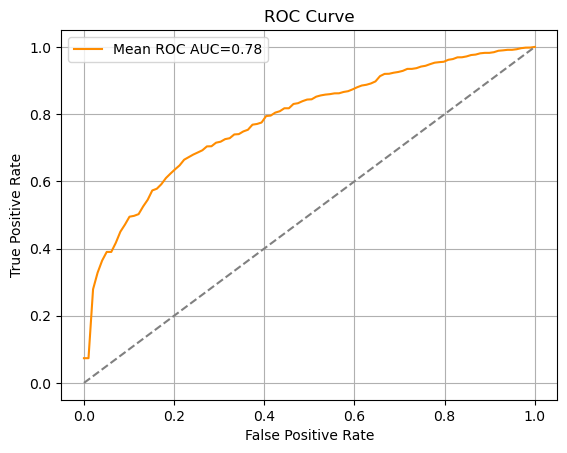

Mean ROC AUC: 0.7826


In [19]:
import matplotlib.pyplot as plt
X_test_df = pd.DataFrame(X_eval_processed, columns=preprocessor.get_feature_names_out())

#Make predictions
y_pred_test = rf_best.predict(X_test_df)
y_proba_test = rf_best.predict_proba(X_test_df)[:, 1]

#Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("=== Final Evaluation on Test Set ===")
print(classification_report(y_eval, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_test, normalize='true', cmap='Blues')
plt.title("Normalized Confusion Matrix (Test Set)")
plt.grid(False)
plt.show()

#ROC and Precision-Recall curves
cross_val_pr_curve(rf_best, X_test_df, y_eval, cv=3)
cross_val_roc_curve(rf_best, X_test_df, y_eval, cv=3)